Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dd = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')
dd=dd.set_index('Quarter')
dd.head(4)

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997


In [3]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [4]:
import re

In [5]:
dd.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [6]:
dd.index = dd.index.str.replace(r'(Q\d)_(\d+)', r'\2-\1')
dd.head()

,Sales
Quarter,
86-Q1,1734.827000
86-Q2,2244.960999
86-Q3,2533.804993
86-Q4,2154.962997
87-Q1,1547.818996


In [7]:
dd.index=pd.PeriodIndex(dd.index, freq='Q').to_timestamp()
dd.head(2)

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999


In [8]:
dd.index

DatetimeIndex(['2086-01-01', '2086-04-01', '2086-07-01', '2086-10-01',
               '2087-01-01', '2087-04-01', '2087-07-01', '2087-10-01',
               '2088-01-01', '2088-04-01', '2088-07-01', '2088-10-01',
               '2089-01-01', '2089-04-01', '2089-07-01', '2089-10-01',
               '2090-01-01', '2090-04-01', '2090-07-01', '2090-10-01',
               '2091-01-01', '2091-04-01', '2091-07-01', '2091-10-01',
               '2092-01-01', '2092-04-01', '2092-07-01', '2092-10-01',
               '2093-01-01', '2093-04-01', '2093-07-01', '2093-10-01',
               '2094-01-01', '2094-04-01', '2094-07-01', '2094-10-01',
               '2095-01-01', '2095-04-01', '2095-07-01', '2095-10-01',
               '2096-01-01', '2096-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-OCT')

In [9]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2086-01-01 to 2096-04-01
Freq: QS-OCT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


In [10]:
# Time Series Analysis

<AxesSubplot:xlabel='Quarter'>

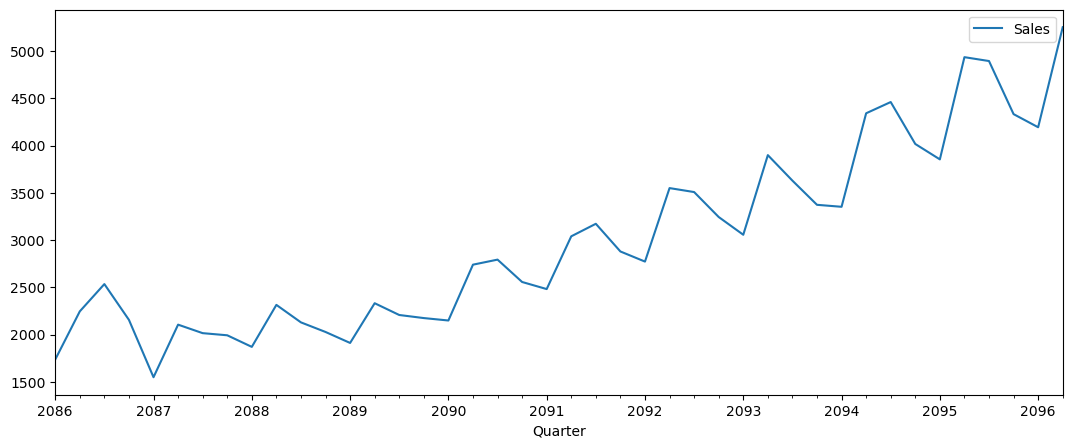

In [11]:
dd.plot(figsize=(13,5))

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

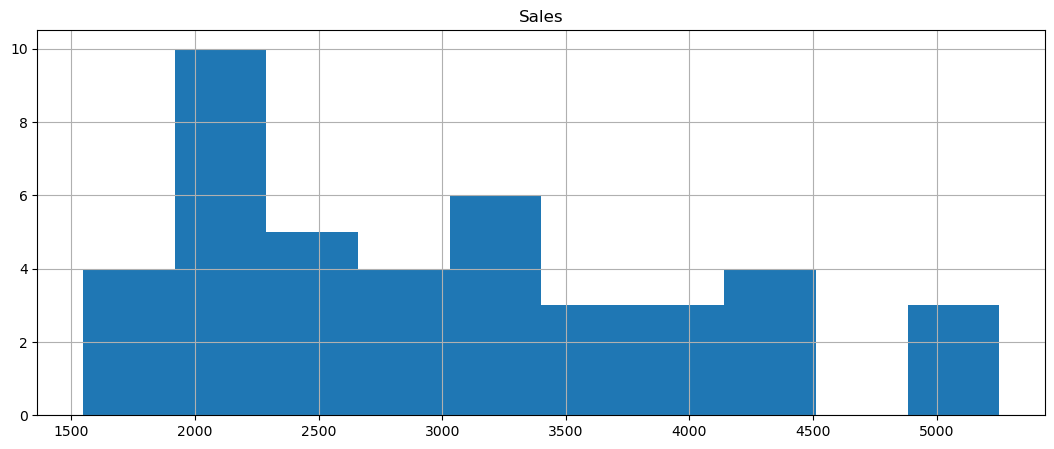

In [12]:
dd.hist(figsize=(13,5))

<AxesSubplot:ylabel='Density'>

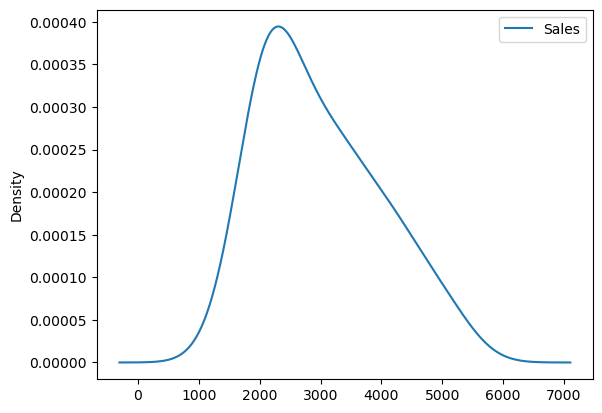

In [13]:
dd.plot(kind='kde')

In [14]:
dd.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [15]:
#time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

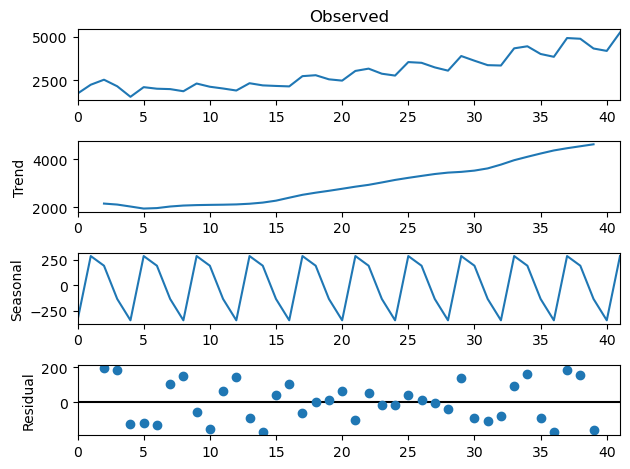

In [16]:
ts_decomp=seasonal_decompose((dd.values),model='additive',period = 4)
ts_plot= ts_decomp.plot()

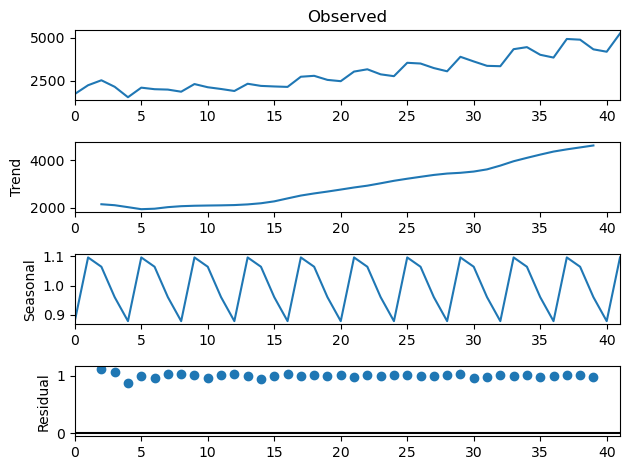

In [17]:
#multiplicative seasonal decompose
ts_deco=seasonal_decompose((dd.values),model='multiplicative',period=4)
ts_deco=ts_deco.plot()

In [18]:
#model building
len(dd)

42

In [19]:
dd_train=dd[0:28]
dd_test=dd[28:]

In [20]:
print("Total records in train set:",len(dd_train))
print("Total records in test set:",len(dd_test))

Total records in train set: 28
Total records in test set: 14


In [21]:
#moving average
dd_m=dd.copy()

In [22]:
train_len=28

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
roll_val=[]
rmse_val=[]

for i in range(4,28,4):
    dd_m['ma_forecast'] = dd_m['Sales'].rolling(i).mean()
    dd_m['ma_forecast'][train_len:] = dd_m['ma_forecast'][train_len-1]
    rmse_ma = mean_squared_error(dd_test['Sales'],dd_m['ma_forecast'][train_len:],squared=False).round(2)
    roll_val.append(i)
    rmse_val.append(rmse_ma)


In [25]:
d=pd.DataFrame({'Rolling window':roll_val,'rmse':rmse_val})
d

,Rolling window,rmse
0,4,1049.59
1,8,1205.98
2,12,1357.90
3,16,1527.27
4,20,1643.99
5,24,1749.03


In [26]:
dd_m['ma_forecast'] = dd_m['Sales'].rolling(4).mean()
dd_m['ma_forecast'][train_len:] = dd_m['ma_forecast'][train_len-1]
rmse_ma = mean_squared_error(dd_test['Sales'],dd_m['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

1049.59

In [27]:
#Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
s_model=SimpleExpSmoothing(dd_train["Sales"]).fit(smoothing_level=0.2)
pred=s_model.predict(start=dd_test.index[0],end=dd_test.index[-1])

In [29]:
rmse=mean_squared_error(dd_test['Sales'],pred,squared=False).round(2)
rmse

1225.36

In [30]:
#Holts's method
from statsmodels.tsa.holtwinters import Holt


In [31]:
h_model=Holt(dd_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
p_holt=h_model.predict(start = dd_test.index[0],end = dd_test.index[-1])

In [32]:
rmse_holt=mean_squared_error(dd_test['Sales'],p_holt,squared=False).round(2)
rmse_holt

538.41

In [33]:
#Holt's Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [34]:
hes_add_add = ExponentialSmoothing(dd_train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = dd_test.index[0],end = dd_test.index[-1])

In [48]:
rmse_hes = mean_squared_error(dd_test['Sales'],pred_hes_add_add,squared=False).round(2)
rmse_hes

559.57

In [49]:
hes_mul_add= ExponentialSmoothing(dd_train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hes_mul_add= hes_mul_add.predict(start = dd_test.index[0],end = dd_test.index[-1])

In [51]:
rmse_hes_mul= mean_squared_error(dd_test['Sales'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul

638.78

In [52]:
#ARIMA model
from statsmodels.graphics.tsaplots import plot_acf

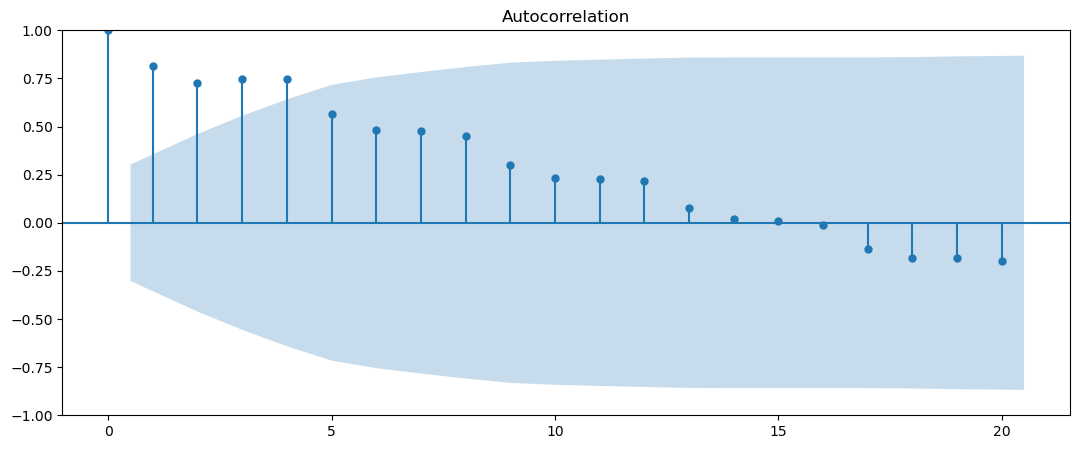

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load the time series data
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')

# Plot the ACF of the time series
plt.figure(figsize=(13,5))
plot = plot_acf(dd['Sales'], ax=plt.gca(), lags=20)
plt.show()

In [54]:
#pcf plot
from statsmodels.graphics.tsaplots import plot_pacf

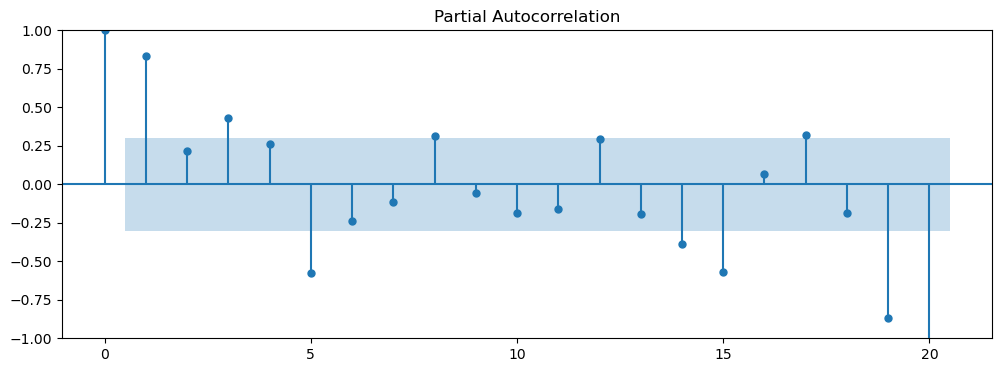

In [55]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( dd['Sales'],ax=plt.gca(),lags=20)
plt.show()

In [56]:
from statsmodels.tsa.arima.model import ARIMA

In [57]:
arima = ARIMA(dd_train['Sales'],order=(1,1,1)).fit()
pred_arima= arima.predict(start = dd_test.index[0],end = dd_test.index[-1])

In [58]:
rmse_arima=mean_squared_error(dd_test['Sales'],pred_arima,squared=False).round(2)
rmse_arima

1062.27

In [59]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse,rmse_holt,rmse_hes,rmse_hes_mul,rmse_arima]
d={'Models':models,'Rmse':rmse}
dd_model=pd.DataFrame(d)
dd_model

,Models,Rmse
0,simple_moving_average,1049.59
1,simple_expo_smoothing,1225.36
2,Holt,538.41
3,Holt_additive,559.57
4,Holt_multiplicative,638.78
5,ARIMA,1062.27


In [61]:
dd_model.sort_values(by='Rmse')

,Models,Rmse
2,Holt,538.41
3,Holt_additive,559.57
4,Holt_multiplicative,638.78
0,simple_moving_average,1049.59
5,ARIMA,1062.27
1,simple_expo_smoothing,1225.36
